In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 展示高清图
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [3]:
# Dataset

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(224),   # resize MNIST to 224 mimic ImageNet
    transforms.Normalize(0.1307, 0.3081)
])

# Download datasets
train_Data = datasets.MNIST(
    root = 'D:/Jupyter/DNN/dataset/mnist',
    train = True,
    download = True,
    transform = transform
)


test_Data = datasets.MNIST(
    root = 'D:/Jupyter/DNN/dataset/mnist',
    train = False,
    download = True,
    transform = transform
)

In [4]:
# batch loader

train_loader = DataLoader(train_Data, shuffle=True, batch_size=64)
test_loader = DataLoader(test_Data, shuffle=False, batch_size=64)

In [5]:
# Build AlexNet

class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet,self).__init__()
    
        self.net = nn.Sequential( 
            # Build neural network
            
            #nn.Conv2d(C, FN, kernel_size, stride, padding)
            # FN = C of next Conv2d
            nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(), 
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Flatten(),
            nn.Linear(6400, 4096), nn.ReLU(),
            nn.Dropout(p=0.5),                   # Dropout
            nn.Linear(4096, 4096), nn.ReLU(),
            nn.Dropout(p=0.5),                  
            nn.Linear(4096, 10)
        )
# Dropout
# Randomly sets a fraction "p" of the neuron outputs to zero in that layer during each forward pass

# AlexNet
# 3 fully connected layers, 5 convolutional layers, deeper than most previous models
# ReLU, training faster and reduced vanishing gradients, previously tanh / sigmoid
# Dropout introduced, reduce overfitting
# Trained on two GPUs in parallel
        
    def forward(self, x):
        # forward propagation
        y = self.net(x) 
        return y       

In [6]:
# Examine Net Structure
X = torch.rand(size= (1, 1, 224, 224)) # 224 instead of 28
for layer in AlexNet().net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Conv2d output shape: 	 torch.Size([1, 96, 54, 54])
ReLU output shape: 	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape: 	 torch.Size([1, 96, 26, 26])
Conv2d output shape: 	 torch.Size([1, 256, 26, 26])
ReLU output shape: 	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape: 	 torch.Size([1, 256, 12, 12])
Conv2d output shape: 	 torch.Size([1, 384, 12, 12])
ReLU output shape: 	 torch.Size([1, 384, 12, 12])
Conv2d output shape: 	 torch.Size([1, 384, 12, 12])
ReLU output shape: 	 torch.Size([1, 384, 12, 12])
Conv2d output shape: 	 torch.Size([1, 256, 12, 12])
ReLU output shape: 	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape: 	 torch.Size([1, 256, 5, 5])
Flatten output shape: 	 torch.Size([1, 6400])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output sh

In [7]:
model = AlexNet().to('cuda:0')
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(
    model.parameters(),
    lr = learning_rate
)

In [8]:
def print_memory_usage():
    allocated = torch.cuda.memory_allocated() / 1024**2  # 转为 MB
    max_allocated = torch.cuda.max_memory_allocated() / 1024**2
    reserved = torch.cuda.memory_reserved() / 1024**2
    
    print(
        f"当前显存占用: {allocated:.2f} MB | "
        f"峰值显存占用: {max_allocated:.2f} MB | "
        f"保留缓存: {reserved:.2f} MB"
    )

# 分配一个 1GB 的张量
# x = torch.ones(256*1024**2, dtype=torch.float32, device='cuda')  # 256M 个 float32（4字节） → 1GB

# print_memory_usage()

当前显存占用: 178.39 MB | 峰值显存占用: 178.39 MB | 保留缓存: 186.00 MB
当前显存占用: 363.04 MB | 峰值显存占用: 791.73 MB | 保留缓存: 1044.00 MB
当前显存占用: 363.04 MB | 峰值显存占用: 791.73 MB | 保留缓存: 1044.00 MB
当前显存占用: 363.04 MB | 峰值显存占用: 791.73 MB | 保留缓存: 1044.00 MB
当前显存占用: 363.04 MB | 峰值显存占用: 791.73 MB | 保留缓存: 1044.00 MB
当前显存占用: 363.04 MB | 峰值显存占用: 791.73 MB | 保留缓存: 1044.00 MB
当前显存占用: 363.04 MB | 峰值显存占用: 791.73 MB | 保留缓存: 1044.00 MB
当前显存占用: 363.04 MB | 峰值显存占用: 791.73 MB | 保留缓存: 1044.00 MB
当前显存占用: 363.04 MB | 峰值显存占用: 791.73 MB | 保留缓存: 1044.00 MB
当前显存占用: 363.04 MB | 峰值显存占用: 791.73 MB | 保留缓存: 1044.00 MB


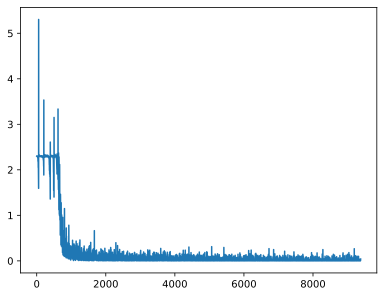

In [9]:
# Training Network
epochs = 10
losses = []    

for epoch in range(epochs):
    print_memory_usage()
    for(x,y) in train_loader:    
        x, y = x.to('cuda:0'), y.to('cuda:0') 
        Pred = model(x)
        loss = loss_fn(Pred, y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Fig = plt.figure()
plt.plot(range(len(losses)), losses)
plt.show()

In [10]:
correct = 0
total = 0

with torch.no_grad():     
    for(x, y) in test_loader:  
        x, y = x.to('cuda:0'), y.to('cuda:0')
        Pred = model(x)       
        
        _, predicted = torch.max(Pred.data, dim = 1)
        correct += torch.sum( (predicted == y) )
        total += y.size(0)

print(f"Test Accuracy：{100*correct/total}%")

Test Accuracy：99.3699951171875%
